In [3]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
stations = pd.read_csv('../data/stations_kanto.csv')

stations.head(10)



,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,station_name_roman
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,706.0,210.635144,200.261250,44092.478846,22317.256266,1.033771,0.002147,366.0,165.080220,NaN
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,672.0,212.306961,176.365231,36061.846385,18873.557190,1.096247,0.003834,277.0,115.765803,NaN
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,879.0,247.449356,220.936925,43252.257861,22209.618128,1.058486,0.001174,335.0,134.570673,NaN
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,872.0,278.826632,220.477262,41545.071412,21726.569992,1.042005,0.000000,301.0,125.451145,NaN
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,999.0,272.668926,246.320245,45257.298857,23983.223340,1.010927,0.000000,418.0,166.874979,NaN
5,1130511,1130511,南浦和,NaN,NaN,11305,11,336-0017,さいたま市南区南浦和２丁目,139.669125,...,1119.0,300.098040,272.599017,52039.970076,26763.337448,1.015478,0.000458,510.0,203.253653,NaN
6,1130512,1130512,東浦和,NaN,NaN,11305,11,336-0922,さいたま市緑区大牧,139.704627,...,816.0,250.371188,241.132398,47999.863277,24374.961347,1.047661,0.001238,372.0,171.841479,NaN
7,1130513,1130513,東川口,NaN,NaN,11305,11,333-0811,川口市戸塚１丁目,139.744087,...,753.0,204.376504,199.350852,46053.098294,23193.649554,1.021008,0.000000,421.0,176.316615,NaN
8,1130514,1130514,南越谷,NaN,NaN,11305,11,343-0845,越谷市南越谷１丁目,139.790499,...,756.0,207.587166,200.997097,40172.074327,20968.856572,1.020021,0.000000,328.0,135.096409,NaN
9,1130525,1130525,越谷レイクタウン,NaN,NaN,11305,11,343-0825,越谷市大成町５丁目,139.822178,...,372.0,105.371597,100.678935,25587.629027,15336.780550,1.060357,0.003091,192.0,81.908286,NaN


In [5]:
X_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


In [6]:
len(stations)

2031

In [8]:
!pip install mglearn

     |████████████████████████████████| 540 kB 3.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 3.3 MB 12.0 MB/s            
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=936a4597f03aa216e9136cedb4e5e38be3389632d3fa408eb981b710c268aa8a
  Stored in directory: /home/jovyan/.cache/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [9]:
from sklearn.preprocessing import StandardScaler

# データ分割
X = stations[X_columns]
X_train = X

#標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [10]:
# k-means法を使うためのインポート
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# hierarchical clusteringを利用するためのモジュールインポート
#階層的クラスタリングはscipyらしい
import mglearn
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import dendrogram, ward


Text(0, 0.5, 'Cluster distance')

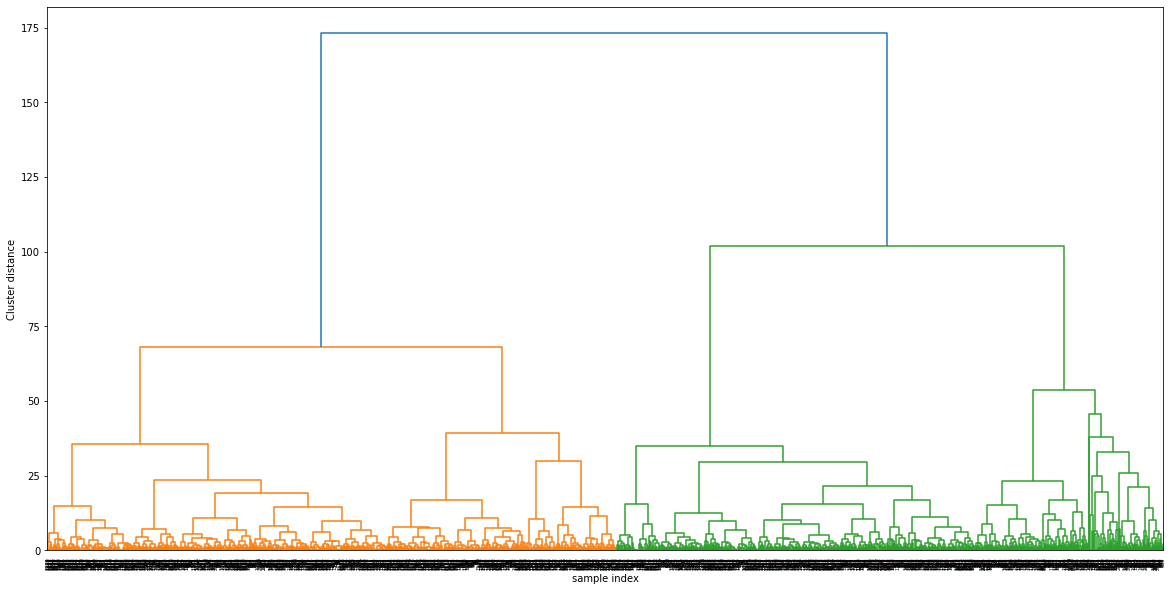

In [11]:
#ward法で分類
linkage_array = ward(X_std)
 
ax = plt.figure(figsize=(20,10)).gca()
dendrogram(linkage_array)
bounds = ax.get_xbound()
 
plt.xlabel("sample index",fontsize=10)
plt.ylabel("Cluster distance",fontsize=10)

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster
 
# クラスタ分けするしきい値を決める。4分割したいので60に設定。
threshold = 60
linkage_array = linkage(X_std, method='ward', metric='euclidean')
 
# クラスタリング結果の値を取得
clustered = fcluster(linkage_array, threshold, criterion='distance')

In [17]:
pd.DataFrame(clustered).describe()

,0
count,2031.000000
mean,2.354998
std,1.083928
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

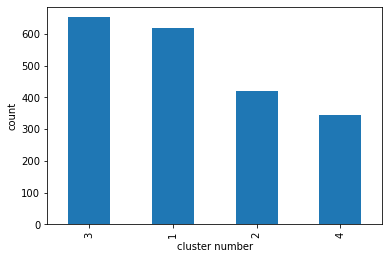

In [18]:
# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(clustered, name='cluster_number', index=stations.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [19]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([stations, pd.Series(labels, index=stations.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,station_name_roman,cluster_number
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,210.635144,200.261250,44092.478846,22317.256266,1.033771,0.002147,366.0,165.080220,NaN,3
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,212.306961,176.365231,36061.846385,18873.557190,1.096247,0.003834,277.0,115.765803,NaN,3
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,247.449356,220.936925,43252.257861,22209.618128,1.058486,0.001174,335.0,134.570673,NaN,1
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,278.826632,220.477262,41545.071412,21726.569992,1.042005,0.000000,301.0,125.451145,NaN,1
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,272.668926,246.320245,45257.298857,23983.223340,1.010927,0.000000,418.0,166.874979,NaN,1


In [21]:
labels.value_counts()

3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64

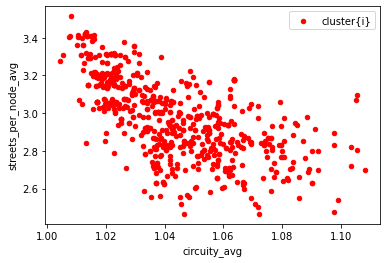

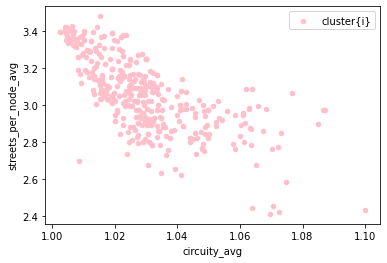

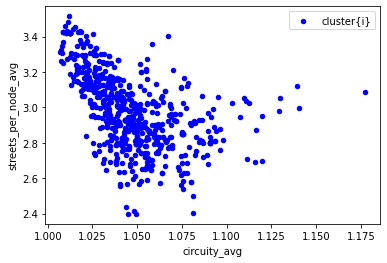

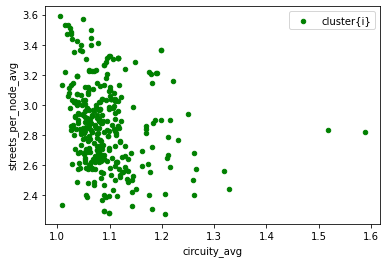

In [23]:
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
stations_3 = stations_with_cluster[stations_with_cluster['cluster_number'] == 3]
stations_4 = stations_with_cluster[stations_with_cluster['cluster_number'] == 4]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue', 'green']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='circuity_avg', y='streets_per_node_avg', color=colors[i - 1], label='cluster{i}', ax=ax)

In [24]:
import folium
center_lat, center_lon = (35.651820534474,139.54461236426)

_map = folium.Map(location=[center_lat, center_lon], zoom_start=11)

for _, station in stations_with_cluster.iterrows():
    color = 'pink' if station['cluster_number'] == 1 else 'blue' if station['cluster_number'] == 2 else 'red' if station['cluster_number'] == 3 else 'green' if station['cluster_number'] == 4 else 'orange'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [25]:
stations_with_cluster.to_csv('./stations_with_hierarchical_cluster_4_without_pca.csv', index=False)